# Part 2: More about channel measurements

This is the second introductory overview of programming the Aspect Device Engine Python API.  
This document is available as pdf and interactive jupyter notebook.
The introduction includes the following objectives:
- Get familiar with multiple measurements at multiple channels

---

In [1]:
from aspectdeviceengine.enginecore import IdSmuService, IdSmuServiceRunner, IdSmuBoardModel
import plotly.graph_objects as go
import numpy as np
srunner = IdSmuServiceRunner()

In [2]:
mbX1 : IdSmuBoardModel = srunner.get_idsmu_service().get_first_board()

channel1 = mbX1.idSmu2Modules['M1.S1'].smu.channels["M1.S1.C1"]
channel2 = mbX1.idSmu2Modules['M1.S1'].smu.channels["M1.S1.C2"]
channel3 = mbX1.idSmu2Modules['M1.S1'].smu.channels["M1.S1.C3"]
channel4 = mbX1.idSmu2Modules['M1.S1'].smu.channels["M1.S1.C4"]
print(channel1)

## Repeated measurements

While measurements can be repeated in the software, e.g. in a loop, as shown in the previous sections, the measurements can also be repeated directly on the hardware.  
This has the advantage that the code is much more compact and that the measurements run much faster.  
The **measure_voltages()** method takes one parameter: the number of repetitions for the measurement.

In [3]:
channel1.enabled = True
channel1.voltage = 1.14
number_of_measurements = 50
voltages_ch1 = channel1.measure_voltages(number_of_measurements)
print(voltages_ch1[1:10])

[1.138671875, 1.138671875, 1.138336181640625, 1.138336181640625, 1.138336181640625, 1.138336181640625, 1.137664794921875, 1.138336181640625, 1.137664794921875]


**Repeat executing** the next cell (Ctrl+Enter) and you will see how the below plot updates.  
The plot stays close to 1.4V. 
Only the usual very small fluctuations due to noise can be seen.

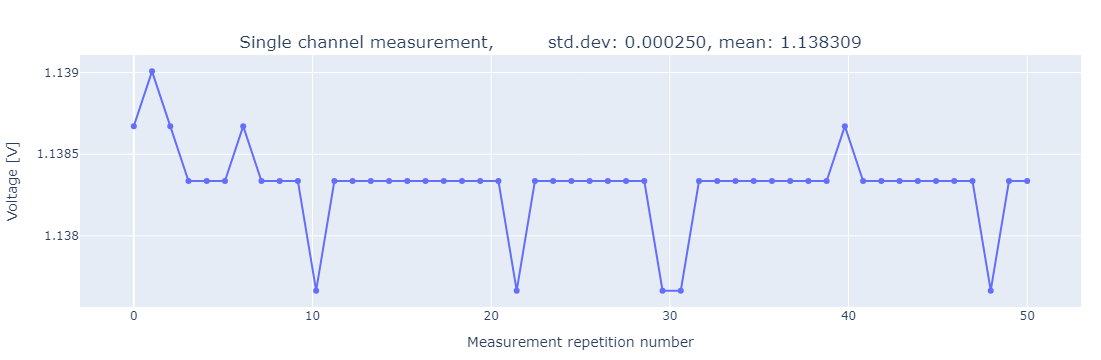

In [7]:
number_of_measurements = 50
voltages_ch1 = channel1.measure_voltages(number_of_measurements)

x_ = np.linspace(0, number_of_measurements, number_of_measurements)
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_, y=voltages_ch1,  mode='lines+markers',  name='voltages_ch1'))

fig.update_layout(  title={'text': f"Single channel measurement, \
        std.dev: {np.std(voltages_ch1):.6f}, mean: {np.mean(voltages_ch1):.6f}",  \
        'y':0.9,  'x':0.5, 'xanchor': 'center',  'yanchor': 'top'}, \
        xaxis_title='Measurement repetition number',  yaxis_title='Voltage [V]', \
        margin=dict(l=20, r=20, t=55, b=20))
fig
#uncomment in pure python script:
#fig.show()

Now we activate the other channels with an offset of one volt each.

In [5]:
channel2.enabled = True
channel2.voltage = 2.14
channel3.enabled = True
channel3.voltage = 3.14
channel4.enabled = True
channel4.voltage = 4.14

The measurements for each channel are run sequentally and the results are displayed in a plot: 

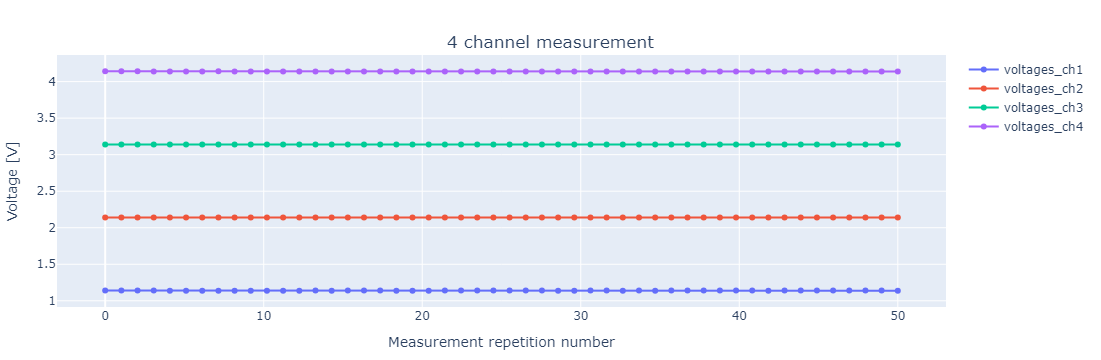

In [6]:
voltages_ch1 = channel1.measure_voltages(50)
voltages_ch2 = channel2.measure_voltages(50)
voltages_ch3 = channel3.measure_voltages(50)
voltages_ch4 = channel4.measure_voltages(50)

x_ = np.linspace(0, 50, 50)
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_, y=voltages_ch1,
                    mode='lines+markers',
                    name='voltages_ch1'))
fig.add_trace(go.Scatter(x=x_, y=voltages_ch2,
                    mode='lines+markers',
                    name='voltages_ch2'))
fig.add_trace(go.Scatter(x=x_, y=voltages_ch3,
                    mode='lines+markers',
                    name='voltages_ch3'))
fig.add_trace(go.Scatter(x=x_, y=voltages_ch4,
                    mode='lines+markers',
                    name='voltages_ch4'))
fig.update_layout(  title={'text': "4 channel measurement",  'y':0.9,  'x':0.5, 'xanchor': 'center',  'yanchor': 'top'},
                   xaxis_title='Measurement repetition number',  yaxis_title='Voltage [V]', margin=dict(l=20, r=20, t=55, b=20))
fig
#uncomment in pure python script:
#fig.show()

Do not forget to shut down the services before proceeding:

In [7]:
srunner.shutdown()